# Method of least squares with a straight line

Designed and developed by Eugenio Tufino and Micol Alemani.

In this notebook, you will learn how to perform linear regression in Python using the least squares method (without and with weighting the data points). You will also learn how to calculate statistical quantities such as the coefficient of determination $r^2$ and the reduced chi-square.

We will use the least squares method here to find the best fit of the straight lines to your experimental data. Suppose you have a set of experimental data $(x_i,y_i)$. You want to find the best linear fit for this data and find out if the relationship between x and y is linear. To fit the data, you use a linear model of the form: $y= b*x +a$, where **b** and **a** are constants corresponding to the slope and intercept of the straight line. You need to determine a and b for the best fit line.

We first define the **residuals** as the difference ($y_i - y = y_i - b*x +a$) between the experimental value i of the dependent measurand $y_i$ and the value y predicted from the model.

**The least squares method consists of finding the parameters a and b that minimise the sum of the squares of the residuals!**


**Attention:** In this notebook we will analyse two different data sets. Be careful with the data variables you want to use and do not mix the data sets!!!

Before we start with the calculations, all the required packages must be imported (as usual):

In [67]:
# import here all the packages we need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


**Defining general values for the graphs parameters :**

In the following we will create many graphs. Therefore, we set some parameters (size of the title, legend, etc.) at the beginning of the notebook. This way we don't have to specify them in the code every time we create a new graph. You can also do this in your future notebooks.

In [68]:
plt.rcParams['figure.figsize'] = (10,5) # size of figure
plt.rcParams['font.size'] = 16    # fonsize of the text
plt.rcParams['legend.fontsize'] = 14  # set fontsize of the legend
#plt.rcParams['lines.linestyle'] = '--'  # if needed we can specify the type of line style
#plt.rcParams['lines.linewidth'] = 2    #line width


Various masses were suspended from a spring and the spring elongation $\Delta s$ was measured:

|Δs(cm)|mass(kg)|
|--|--|
|42.0 | 2|
|48.4 |	4|
|51.3	| 6|
|56.3	| 8|
|58.6	| 10|

## Representing data with Pandas dataframe and creating a graph
In the following example, we show how to represent data in the Pandas dataframe by creating a new dataframe from scratch.

In [69]:
spring = {'displacement (cm)': [42.0,48.4,51.3,56.3,58.6],
            'mass (kg)': [2,4,6,8,10]} # we define here the data, by using dictionary and list.
df_spring = pd.DataFrame(data=spring) # the command DataFrame create the pandas dataframe

In [70]:
df_spring.head() # with this command we look at the structure of the dataframe (only the first 5 rows will appear by default)

,displacement (cm),mass (kg)
0,42.0,2
1,48.4,4
2,51.3,6
3,56.3,8
4,58.6,10


In [71]:
print(df_spring.columns) # This commands is used to print the names of the columns

Index(['displacement (cm)', 'mass (kg)'], dtype='object')


This is how you assign the values of the two columns to x and y:

In [72]:
x_spring = df_spring['mass (kg)'] #assign to x the values in the column 'mass (kg)'
y_spring = df_spring['displacement (cm)'] #assign to y the values in the column 'displacement (cm)'

Now we plot the data:

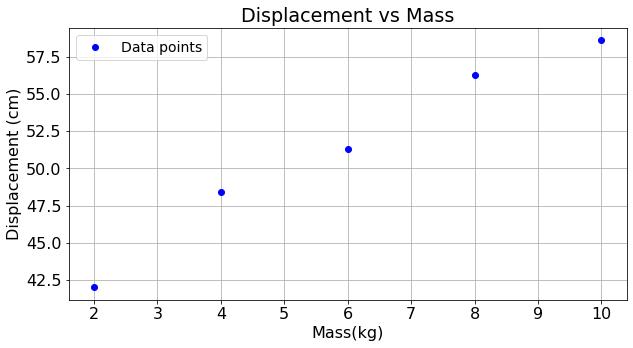

In [73]:
plt.plot(x_spring,y_spring, 'bo', label='Data points')
plt.grid(True)
plt.legend()
plt.xlabel('Mass(kg)')
plt.ylabel('Displacement (cm)')
plt.title("Displacement vs Mass")
plt.show()

### A better way to use the Pandas potentialities for graphing:
You can skip the assignments of x and y by using the Pandas **plot.scatter** method to access directly to dataframe columns, as in the following example:

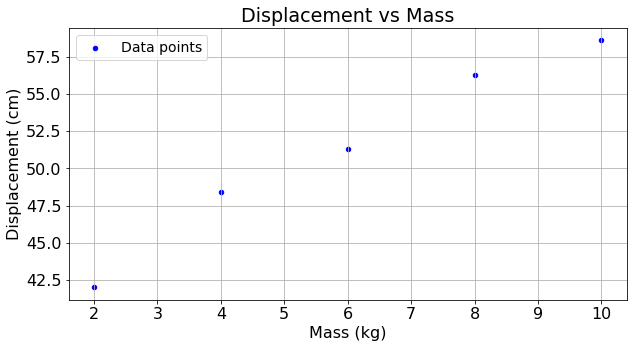

In [74]:
df_spring.plot.scatter('mass (kg)','displacement (cm)', color='blue',label='Data points')
plt.grid(True)
plt.legend()
plt.xlabel('Mass (kg)')
plt.ylabel('Displacement (cm)')
plt.title("Displacement vs Mass")
plt.show()

**Exercise 1:**

In an experiment, a stone is thrown vertically upwards with initial velocity $v$.
A student makes seven throws to check if the relationship between $v^2$ and the stone height h is of the form $v^2=2gh$.

The student's data in a Pandas data frame is shown in the following cell.

Assign h and $v^2$ to the variables x and y and then plot $v^2$ against h including vertical bars associated with the uncertainties of y.

In [75]:
#Data

# we define here the data with a dictionary and a list
stone = {'h (m)': [0.4,0.8,1.4,2.0,2.6,3.4,3.8], 'v^2 (m/s)^2': [7,17,25,38,45,62,72],
         'Uncertainties on v^2 (m/s)^2':[3,3,3,4,5,5,6]} # we define here the data, by using dictionary and list.
stone_df=pd.DataFrame(data=stone)
stone_df.head()

,h (m),v^2 (m/s)^2,Uncertainties on v^2 (m/s)^2
0,0.4,7,3
1,0.8,17,3
2,1.4,25,3
3,2.0,38,4
4,2.6,45,5


To plot the uncertainty bars of the $y_i$ data points, the function `errorbar` can be be used. This function is similar to the `plot` function.

### polyfit (optional, you can do this at home if you want)
One could implement a separate function for the least squares method, but Python packages provide a variety of solutions. One of these is the function [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) to find the parameters **a** and **b** that describe the best straight line.
The general syntax is:

```
# np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```

The third parameter of the function `polyfit` is `deg`. This allows us to set the **degree** of the fit polynomial.

For the best straight line we set `deg=1`.

In the following example we use the function `polyfit` for a fit of the spring data.

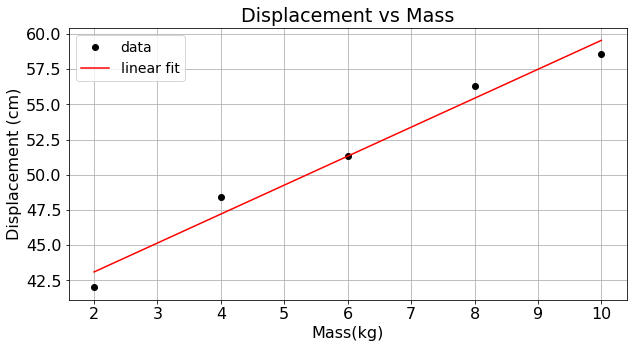

The best fit line has the following parameters: 
======y=bx+a===========

b= 2.05 cm/kg
a=38.99 cm



In [76]:
b, a,  = np.polyfit(x_spring,y_spring,deg=1) # polyfit returns the parameters slope and intercept. Here we assign these parameters to b and a
plt.plot(x_spring, y_spring,'ko', label='data')
plt.plot(x_spring, b*x_spring+a,'r',label='linear fit')
plt.grid(True)
plt.legend()
plt.xlabel('Mass(kg)')
plt.ylabel('Displacement (cm)')
plt.title("Displacement vs Mass")
plt.show()
print("The best fit line has the following parameters: ")
print("======y=bx+a===========\n")
print("b={:5.2f} cm/kg".format(b))
print("a={:5.2f} cm".format(a))
print()

## End of the optional part. From here on, all students must continue working on everything!

### Curve_fit

To fit arbitrary functions (not only polynomials), you can use the function `curve_fit()` from the **Scipy** package.

```python
 from scipy.optimize import curve_fit
 scipy.optimize.curve_fit(func, x, y)
```

The `curve_fit` function allows us to fit using a self-defined function. In the code above, `func` is the fitting function.

When you run this code, the function returns two numpy arrays. The first contains the slope **b** and y-intercept **a** values that best describe the data. The second contains the covariance matrix of the fit (see below).


**Note for future experiments**: If the fit is non-linear, you will need to specify an initial value for the fit parameters in "curve_fit" (since the process is done by iterative repetition). For example, you could start with a=1 and b=1.

### Definition of a (linear) fitting function to use **curve_fit**:

In [77]:
def linear_fit(x,b,a):
    return b*x+a

Here we apply the curve_fit function to the data of the spring:

In [78]:
params, params_covariance = curve_fit(linear_fit, x_spring, y_spring)
# the parameters of the linear fit are stored in the array called 'params' (in our case params[0]=b and params[1]=a)
# we also get the covariance matrix and assign it to varaible 'params_covariance'.

The curve_fit function returns two elements, namely "params" and "params_covariance".

The argument "parameter" corresponds to the fit parameters for **b** and **a**. In the following code their values are printed:

In [79]:
slope=params[0]
intercept=params[1]
print("The slope of the linear_fit function is:{:5.2f} cm/kg".format(slope))
print("The intercept of the linear_fit function is:{:5.2f} cm".format(intercept))

The slope of the linear_fit function is: 2.06 cm/kg
The intercept of the linear_fit function is:38.99 cm


The second "parameter_covariance" corresponds to the covariance matrix (a 2x2 matrix). From the covariance matrix, the **uncertainties of the slope and the intercept** can be extracted. They correspond to the values on the diagonal of the covariance matrix. In the following code, the **uncertainties for slope and intercept** are printed, which are stored in parameter_covariance:

In [80]:
u_slope = np.sqrt(params_covariance [0][0])  # uncertainty on the slope
u_intercept= np.sqrt(params_covariance [1][1]) # uncertainty on the intercept
print("Uncertainty on slope u_b={:5.2f} cm/kg".format(u_slope))
print("Uncertainty on intercept u_a={:5.2f} cm".format(u_intercept))

Uncertainty on slope u_b= 0.19 cm/kg
Uncertainty on intercept u_a= 1.25 cm


Now we plot the data of the spring and the line of best fit from curve_fit:

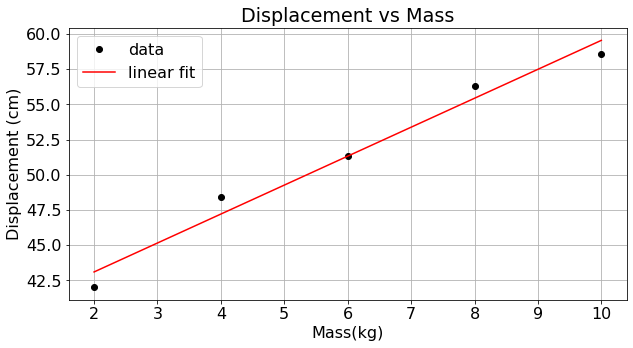

The best fit line has the following parameters: 
======y=bx+a===========

b= 2.06 cm/kg
a=38.99 cm


In [81]:
plt.plot(x_spring, y_spring,'ko', label='data')
plt.plot(x_spring, slope*x_spring+intercept,'r',label='linear fit')
plt.grid(True)
plt.legend(fontsize=16)
plt.xlabel('Mass(kg)', fontsize=16)
plt.ylabel('Displacement (cm)',fontsize=16)
plt.title("Displacement vs Mass")
plt.show()
print("The best fit line has the following parameters: ")
print("======y=bx+a===========\n")
print("b={:5.2f} cm/kg".format(slope))
print("a={:5.2f} cm".format(intercept))

### Calculation of the coefficient of determination $r^2$

In the following code, we calculate the coefficient of determination for the spring example using a simple formula that includes the residuals.

In [82]:
x_data=x_spring
y_data=y_spring

residuals = y_data- linear_fit(x_data,slope,intercept) # here we calculate the residuals
ss_res = np.sum(residuals**2) # here we calculate the sum of the residuals squared
ss_tot = np.sum((y_data-np.mean(y_data))**2) # here we calculate the variance in the y data
r_squared = 1 - (ss_res / ss_tot) # this is the formula to calculate the coefficient of determination
print ("r squared =",r_squared) #here we print put r^2

r squared = 0.9753620343210847


### The residuals

When conducting experiments, it is useful to record the residuals $y_i-bx-a$.
We will now see how examining the residuals can help to find out if you have systematic errors in the experimental data.
If the best fit line model is working well, the residuals should have random fluctuations around 0 and show no obvious trend. However, if the residuals are not randomly distributed around zero but show a trend, caution is needed. If the linear model is correct, then a trend in the residuals is an indication that our experimental data show systematic effects. In this case, we should take time and effort to solve this problem and remove the systematic effects. Again, a look at the residuals will help.

In the following code we calculate the residuals for the spring data.

**Comment:** To create a figure with two or more subplots, you can use the matplotlib function **subplots**.

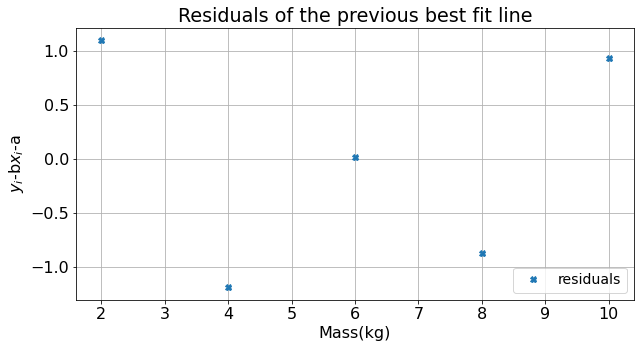

In [83]:
#x_data and y_data and slope and intercept of the associated  fit
x_data=x_spring
y_data=y_spring
residuals=slope*x_data+intercept-y_data
plt.plot(x_data, residuals, 'X', label='residuals')
plt.title("Residuals of the previous best fit line")
plt.xlabel('Mass(kg)')
plt.ylabel('$y_i$-b$x_i$-a')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Exercise 2:**

Find the best fitting line for the points of the previous exercise (speed of the stone) and plot it together with the data. Find the slope and assess whether the result agrees with the value of $g=9.81 m/s^2$.
We assume that the uncertainties in x are negligible and the uncertainties in y are all equal. Therefore, we should use the least squares method without weighting here.
The data are stored in the stone_df dataframe above.

**Exercise 3:**
Calculate the value of $r^2$ for the above experiment with the stone.

## Best fit with variable uncertainties (weighted least squares method).

Suppose one has a set of N data points $(x_i,y_i)$ and the uncertainties of $x_i$ are negligible while the values of $y_i$ have variable estimated uncertainties. We call these uncertainties $\sigma_i$. As you know from the previous lessons of our course, in this case we give a weight $w_i=1/\sigma_i^2$ to each measured $y_i$.
In the following we will fit the data with a linear function $y=bx+a$ using this discussed weighting.

Here we apply the weighted least squares method to the spring experiment.

Consider the same data set of the spring experiment and add the uncertainties in the measurements of the displacements $y_i$ as shown in the following code:

In [84]:
spring_with_uncertainties = {'displacement (cm)': [42.0,48.4,51.3,56.3,58.6],
            'mass (kg)': [2,4,6,8,10],'uncertainties displ. (cm)':[1.2,3.7,2.1,3.4,1.8]}

We define a new pandas dataframe

In [85]:
df2=pd.DataFrame(data=spring_with_uncertainties)   # defined a new dataframe

and take a look at the dataframe here:

In [86]:
df2.head()

,displacement (cm),mass (kg),uncertainties displ. (cm)
0,42.0,2,1.2
1,48.4,4,3.7
2,51.3,6,2.1
3,56.3,8,3.4
4,58.6,10,1.8


In the following code, we assign the variables to the values in the data frame:

In [87]:
x2= df2['mass (kg)']
y2=df2['displacement (cm)']
yerr2=df2['uncertainties displ. (cm)']

To display the uncertainty bar of the $y_i$ data, we use the function **errorbar**.

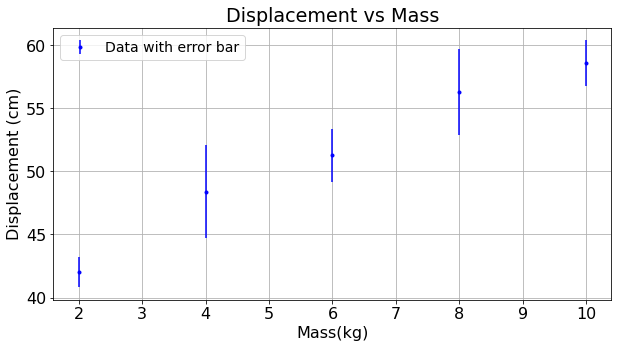

In [88]:
# Create a graph showing the data with error bars
plt.errorbar(x2,y2,yerr2,fmt='b.',label='Data with error bar')
plt.grid(True)
plt.legend(loc="upper left")  # location of the legend
plt.xlabel('Mass(kg)')
plt.ylabel('Displacement (cm)')
plt.title("Displacement vs Mass")
plt.show()

**How to display uncertainty bars in the diagram with caps:**

You can also display the uncertainty bars with caps. To do this, you just have to add 'capsize = font size' to the argument plt.errorbar. For the example above, this would be:
```python
plt.errorbar(x2,y2,yerr2,fmt='b.',label='data with uncertainty bar', capsize=10)
```
Try it yourself!

We now extend the previously used function **curve_fit** by the argument 'sigma=yerr'. We also need to add the variable 'absolute_sigma=True':

In [89]:
params, params_covariance = curve_fit(linear_fit, x2, y2,sigma=yerr2,absolute_sigma=True)
print(params) #Optimal values for the parameters so that the sum of the squared residuals is minimized.
print(params_covariance)   #The estimated covariance of params

[ 2.11443674 38.05309837]
[[ 0.06652116 -0.32653028]
 [-0.32653028  2.32256645]]


The variable "params" contains the values of the parameters **b** and **a** ($params[0]$ and $params[1]$ ) for the best fit. So that we actually get:

$ y =params[0]* x +params[1]$


The variable params_covariance contains the covariance matrix (2x2) from which we can calculate the uncertainties for slope and intercept. The covariance matrix has the following form:

$$\left(
\begin{array} {cc}
\ C_{00} & C_{10} \\
 C_{01} & C_{11} \
\end{array}\right)$$

We are interested in the diagonal elements of this matrix, where for example the uncertainty for the intercept (params[1]) is:

$$\sigma_{params[1]}=\sqrt{C_{11}}$$

and the uncertainty for the slope is:

$$\sigma_{params[0]}=\sqrt{C_{00}}$$

The other two elements of the covariance matrix describe the covariance between the two different parameters (slope and intercept), but their use is beyond the scope of this course.


See Ref. [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [90]:
slope = params[0] # slope b
intercept = params[1]   # intercept a
u_slope= np.sqrt(params_covariance[0][0]) # uncertainty in the slope
u_intercept = np.sqrt(params_covariance[1][1])   # uncertainty in the intercept
print("slope=", slope, "cm/kg\n", "u_slope=",u_slope, "cm/kg\n", "intercept=", intercept,"cm\n", "u_intercept=",u_intercept, "cm\n") #the symbol \n is used to insert a new line

slope= 2.1144367388233323 cm/kg
 u_slope= 0.25791696530219727 cm/kg
 intercept= 38.053098371458425 cm
 u_intercept= 1.5239968651948332 cm



Now we create a diagram with the data and the fit line of the new fit:

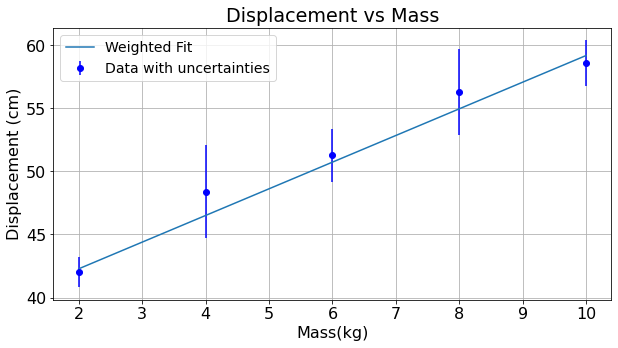

In [91]:
# Create a graph showing the data and error bar
plt.errorbar(x2,y2,yerr2,fmt='bo',label='Data with uncertainties')

# Create a graph of the best fit line to the data.

plt.plot(x2,slope*x2+intercept,label='Weighted Fit')
plt.grid()
plt.legend()
#plt.legend(loc='upper left') # with the 'loc' paramter you can choose where locate the legend
plt.xlabel('Mass(kg)')
plt.ylabel('Displacement (cm)')
plt.title("Displacement vs Mass")
plt.show()

To show the result of the best fit, we can also write:

In [92]:
print('The slope is b ={:5.1f} cm/kg, with uncertainty {:5.1f} cm/kg'.format(slope,u_slope))
print('The intercept is  a= {:5.1f} cm, with uncertainty {:5.1f} cm'.format(intercept,u_intercept))

The slope is b =  2.1 cm/kg, with uncertainty   0.3 cm/kg
The intercept is  a=  38.1 cm, with uncertainty   1.5 cm


## Chi-square and reduced chi-square

The chi-square values and the reduced chi-square values are calculated below. \
The **chi-squared** is defined as follows:

$$χ^2 = \sum_{i=1}^nw_i[y_i-(bx_i+a)]^2$$

The **reduced chi-square** is defined as:


$$\chi_{r}^2 = \frac{χ^2}{d} = \frac{χ^2}{N-2}$$


The d in the denominator is equal to the number of **degrees of freedom d** of the fit (often denoted **doF**). This is equal to the number of measurements N minus the number of parameters calculated in the fit. In the case of a linear fit, d is equal to N-2 (2 because we have two parameters, the slope and the intercept).

As you know, a good fit is one for which.


**$\chi_{r}^2$ $\approx$ 1**

In the following code, we define a function that calculates the **reduced chi-square**:


In [93]:
def reduced_chi_square(x, y, yerr, f, *args):
    '''reduced Chi-Squared function     # in Python triple quotation marks represents a more general category of comments, named 'docstrings'. It is used in function or module definition.
    x, y and yerr are numpy arrays, referring to x, y and yerr data
    f is the function we are fitting.
    args are the arguments of the function we have fit.
    '''
    # in Python stands in triple quotes for a more general category of comments called "docstrings". They are used in function or module definitions
    return 1/(len(x)-len(args))*np.sum((f(x, *args)-y)**2/yerr**2)

**Exercise 'Try it yourself':**
Write `help(reduced_chi_square)`, what do you read?

Now we calculate the reduced chi-square for the spring data with uncertainties:

In [94]:
reduced_chi_square(x2,y2,yerr2,linear_fit, *params)

0.21686948611274193

**Exercise 4:**

Find the **weighted** best fit line for the stone experiment above and plot your results. Find the slope and discuss whether the results agree with the value of $g=9.81m/s^2$. Also calculate the reduced chi-square. Note that the data are stored in the stone_df data frame.

**Important note:** In the last example (of the reduced chi-square) we defined a function for calculating the reduced chi-square. To optimise the other codes in this notebook, you could also define functions for calculating the r^2 and for making plots...

In a separate notebook on Moodle you will find an example of using the function **curve_fit** in a physics experiment. In this experiment, we use the curve_fit function to determine the relationship between the illuminance of a light bulb as a function of distance from a smartphone light sensor. You can also take a look at this notebook yourself.

## Conclusion:

CONGRATULATIONS!!!!!!!! You have reached the end of this introduction to Jupyter Notebooks and Python programming :-).


We hope that you now feel ready to use Jupyter Notebooks in the future. Of course, we don't expect you to be already 'fluent' in Python programming, but at least motivated to keep practicing with it!
You can use the notebooks we have provided as a guide for your lab activities in the future.

Best regards,
     
    ````´´´´´        -------
      I   I         !  0 0  !
        .           !   °   !
     ^^^^^^^        !  ---  !
     
     Eugenio   and    Micol

## **Attention:**

Do not forget to save your notebook before you close it! After you have saved the notebook, the notebook must be converted to a PDF. Upload both files PDF and the original Jupiter Notebook (The file extension is '.ipynb') to Moodle.

There are several ways to convert the notebook to PDF, each of which varies by environment. We present here the three options, for Anaconda/Jupiter notebooks, Google Colab and for the Jupyter.org/JupyterLab browser application.

**Anaconda/JupyterNotebooks:** To save the notebook click on 'Files'/'File' and there on 'Download as Notebook (.ipynb)'/'Save as Notebook (.ipynb)'. To convert the notebook to PDF click on 'Files'/'File' and press 'print preview' and then print it as PDF.  

**Google Colab:** To download the notebook click here on 'Files' and select 'download .ipynb'. To convert the notebook to PDF click on 'Files'/'File' and press 'print preview' and then print it as PDF.

**Web browser application Jupyter.org (Here you should use JupyterLab!!!!)**: To download the notebook click on 'Files' and select 'download'. To convert it to a PDF go to 'File', select 'print' and then 'print pdf'.